<a href="https://colab.research.google.com/github/TanViCh0UhAn12/ML/blob/main/ANN_regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import seaborn as sns
import pandas as pd
import numpy as np

In [71]:
churn = pd.read_csv('/content/Churn_Modelling.csv')

In [72]:
df = churn
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [74]:
df['Exited'].unique()

array([1, 0])

In [75]:
df['Exited'].nunique()

2

In [76]:
x=df.iloc[:,7:13]
y=df['Exited']
x.head(),y.head()

(   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0       2       0.00              1          1               1   
 1       1   83807.86              1          0               1   
 2       8  159660.80              3          1               0   
 3       1       0.00              2          0               0   
 4       2  125510.82              1          1               1   
 
    EstimatedSalary  
 0        101348.88  
 1        112542.58  
 2        113931.57  
 3         93826.63  
 4         79084.10  , 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Exited, dtype: int64)

In [77]:
ys=y.squeeze()
pdy=pd.get_dummies(ys).values
print(pdy[:8])

[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]]


In [78]:
# Splitting x & y in train & test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, random_state=30)

In [79]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)
x_train[:8], x_test[:8]

(array([[0.        , 0.        , 0.33333333, 1.        , 0.        ,
         0.13893034],
        [0.2       , 0.49155958, 0.        , 0.        , 0.        ,
         0.51738251],
        [0.3       , 0.        , 0.33333333, 0.        , 0.        ,
         0.70500871],
        [0.1       , 0.45553348, 0.        , 1.        , 0.        ,
         0.15722837],
        [0.6       , 0.34561467, 0.        , 1.        , 0.        ,
         0.42910848],
        [0.1       , 0.        , 0.33333333, 1.        , 0.        ,
         0.63392322],
        [0.7       , 0.        , 0.        , 1.        , 0.        ,
         0.64580567],
        [0.7       , 0.48731037, 0.        , 1.        , 0.        ,
         0.69265133]]),
 array([[0.8       , 0.43329128, 0.33333333, 1.        , 1.        ,
         0.65339947],
        [0.1       , 0.47156324, 0.33333333, 0.        , 0.        ,
         0.46994816],
        [0.7       , 0.62656197, 0.        , 0.        , 1.        ,
         0.86738957

In [80]:
print(pd.DataFrame(x_train).describe())
print(pd.DataFrame(x_test).describe())

                 0            1            2            3            4  \
count  7500.000000  7500.000000  7500.000000  7500.000000  7500.000000   
mean      0.502053     0.302696     0.177289     0.707600     0.515733   
std       0.289093     0.249027     0.194355     0.454895     0.499786   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.300000     0.000000     0.000000     0.000000     0.000000   
50%       0.500000     0.385840     0.000000     1.000000     1.000000   
75%       0.800000     0.508541     0.333333     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5  
count  7500.000000  
mean      0.502280  
std       0.287873  
min       0.000000  
25%       0.256118  
50%       0.504418  
75%       0.748264  
max       1.000000  
                 0            1            2            3            4  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000

In [81]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 6)
(2500, 6)
(7500,)
(2500,)


In [82]:
from sklearn.neural_network import MLPRegressor

In [83]:
mlpr=MLPRegressor(hidden_layer_sizes=(100,100), activation='relu',max_iter=100, solver='adam')


In [84]:
mlpr.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=100)

In [85]:
y_pred_r=mlpr.predict(x_test)
print('y_test', y_test)
print('y_pred_r', y_pred_r)

y_test 8793    0
1122    1
1283    0
9318    0
7765    0
       ..
9892    0
3012    0
6117    0
9990    0
6828    0
Name: Exited, Length: 2500, dtype: int64
y_pred_r [0.05149312 0.26381444 0.11874145 ... 0.07312335 0.46881378 0.23107792]


In [86]:
from sklearn import metrics

mae=metrics.mean_absolute_error(y_test, y_pred_r)
mse=metrics.mean_squared_error(y_pred_r,y_test)
r2sq=metrics.r2_score(y_pred_r, y_test)
print(mae, mse, r2sq)

0.2638963095665314 0.13818387329261117 -2.9570953757988168


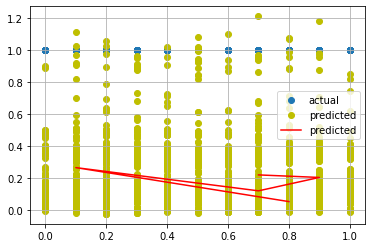

In [87]:
import matplotlib.pyplot as plt
plt.scatter(x=x_test[:,0], y=y_test, label='actual')
plt.scatter(x_test[:,0], y_pred_r, c='y', label='predicted')
plt.plot(x_test[:5,0], y_pred_r[:5], c='r', label='predicted')
plt.legend()
plt.grid()
plt.show()